# Exploratory Data Analysis in R
## -- DataCamp - Data Analyst Career Track - Course 7 --

 **Note**

To use this code, select the R environment in Anaconda
 
 **Used packages**
 - tidyverse
 - rio 
 - patchwork - multi-plot layouts
 - openintro - datasets
 
**Table of content**
- [&nbsp;&nbsp;1. Exploring Categorical Data](#toc_74821_1)
    - [&nbsp;&nbsp;1.1 Count data](#toc_74821_1.1)
    - [&nbsp;&nbsp;1.2 Proportions](#toc_74821_1.2)
- [&nbsp;&nbsp;2. Exploring Numerical Data](#toc_74821_2)
    - [&nbsp;&nbsp;2.1 Distribution of one variables](#toc_74821_2.1)
    - [&nbsp;&nbsp;2.2 Distribution of two or more variables](#toc_74821_2.2)
- [&nbsp;&nbsp;3. Numerical Summaries](#toc_74821_3)
    - [&nbsp;&nbsp;3.1 Center measures](#toc_74821_3.1)
    - [&nbsp;&nbsp;3.2 Measures of variability](#toc_74821_3.2)
    - [&nbsp;&nbsp;3.3 Outliers](#toc_74821_3.3)

**Set environment and plot size**

In [2]:
suppressMessages(library(tidyverse))
suppressMessages(library(rio))
suppressMessages(library(patchwork))
options(repr.plot.width=7, repr.plot.height=7) # controls display format
theme_set(theme_grey(base_size =10))

Note: if the above code return an error message:
- Check that the correct R environment is selected in Anaconda
- Restart computer

**Import data**

In [3]:
cars <- import("data/cars04.csv")
comics <- import("data/comics.csv")
life <- import("data/life_exp_raw.csv")

<a name="toc_74821_1"></a>
## 1.   Exploring Categorical Data
Some common EDA options for categorical data:
- Contingency tables
- Proportion tables (conditional)
- Bar charts (stacked, dodged, filled, faceted)
- pie charts

In [4]:
comics <- comics %>%
 mutate_if(is.character, as.factor)

glimpse(comics)

Rows: 23,272
Columns: 11
$ name         <fct> "Spider-Man (Peter Parker)", "Captain America (Steven Rog~
$ id           <fct> Secret, Public, Public, Public, No Dual, Public, Public, ~
$ align        <fct> Good, Good, Neutral, Good, Good, Good, Good, Good, Neutra~
$ eye          <fct> Hazel Eyes, Blue Eyes, Blue Eyes, Blue Eyes, Blue Eyes, B~
$ hair         <fct> Brown Hair, White Hair, Black Hair, Black Hair, Blond Hai~
$ gender       <fct> Male, Male, Male, Male, Male, Male, Male, Male, Male, Mal~
$ gsm          <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N~
$ alive        <fct> Living Characters, Living Characters, Living Characters, ~
$ appearances  <int> 4043, 3360, 3061, 2961, 2258, 2255, 2072, 2017, 1955, 193~
$ first_appear <fct> "Aug-62", "Mar-41", "Oct-74", "Mar-63", "Nov-50", "Nov-61~
$ publisher    <fct> marvel, marvel, marvel, marvel, marvel, marvel, marvel, m~


<a name="toc_74821_1.1"></a>
**1.1 Count data**

In [4]:
levels(comics$align)

[1] "Bad"                "Good"               "Neutral"           
[4] "Reformed Criminals"

**Marginal distribution** is a distribution of a variable that ignores a more extensive set of related variables in a dataset. We can see the marginal distribution of a variable using the `table()` function on only the given variable.

In [5]:
comics_filtered <- comics %>%
  filter(align != "Reformed Criminals") %>% # drop level with fewest total entries
  droplevels() #  drop unused factor levels 

In [6]:
table(comics_filtered$id)


No Dual  Public  Secret Unknown 
   1511    6067    7927       9 

In [8]:
ggplot(comics_filtered, aes(x = id)) +
  geom_bar()

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): unable to start png() device


plot without title

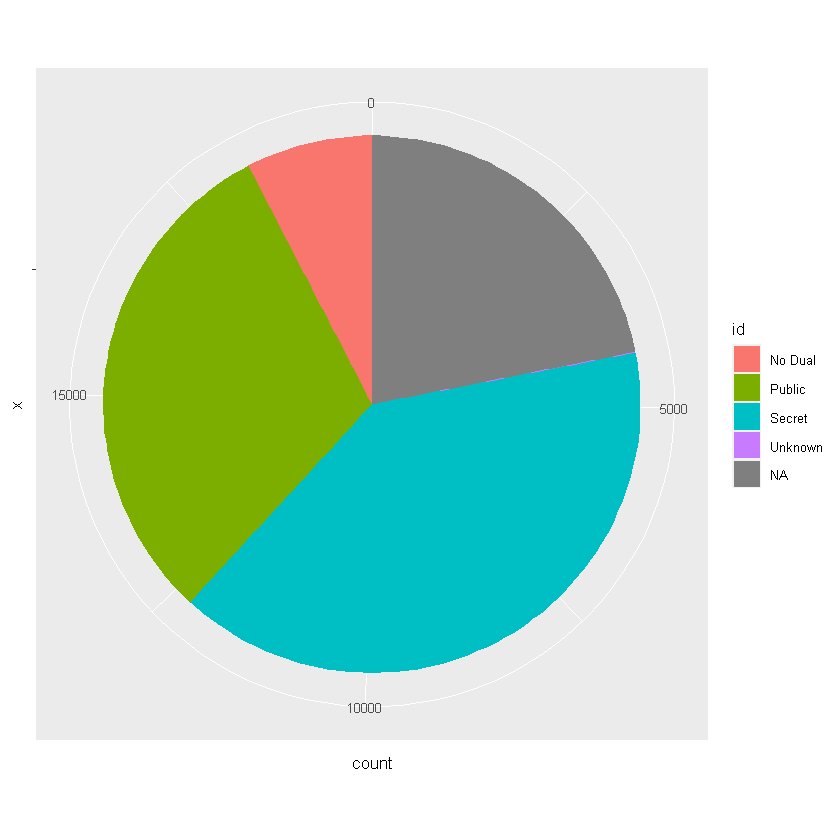

In [8]:
ggplot(comics_filtered, aes(x = "", fill = id)) +
  geom_bar() +
  coord_polar("y", start=0)

☝️ Same information as above but can be less readable.

**Conditional distribution**: is a distribution of values for one variable that exists when you specify the values of other variables. The table below shows the relative frequency of each category of variable.

In [9]:
# Create a 2-way contingency table
table(comics$id, comics$align)

         
           Bad Good Neutral Reformed Criminals
  No Dual  474  647     390                  0
  Public  2172 2930     965                  1
  Secret  4493 2475     959                  1
  Unknown    7    0       2                  0

☝️ The most common category is Bad characters with Secret identities.

Let's visualize these conditional distributions:

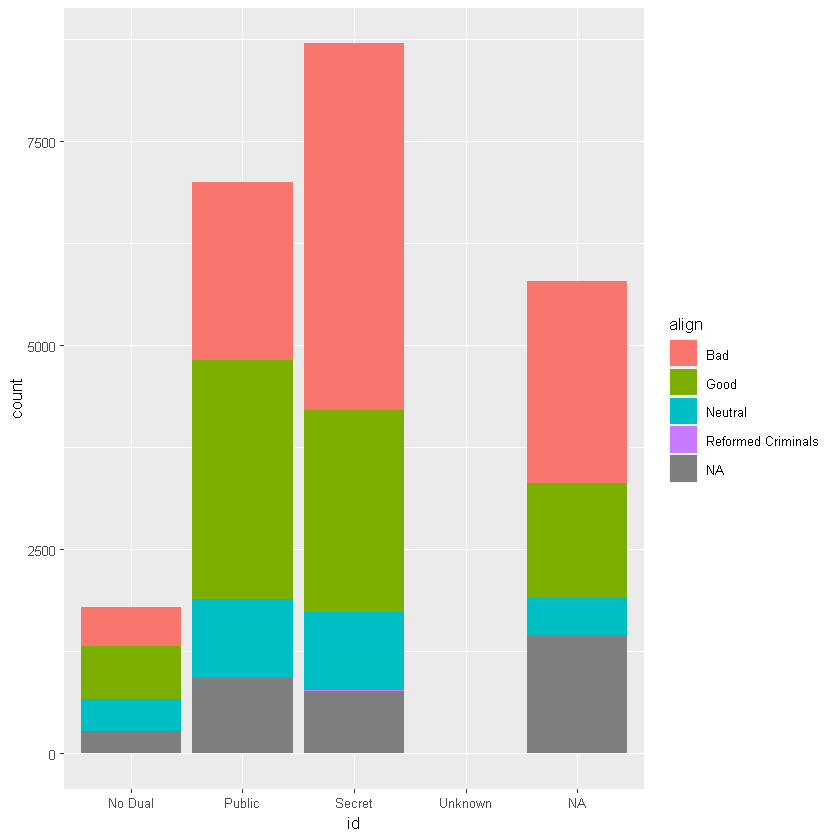

In [10]:
comics %>%
  ggplot(aes(x = id, fill = align)) +
  geom_bar()

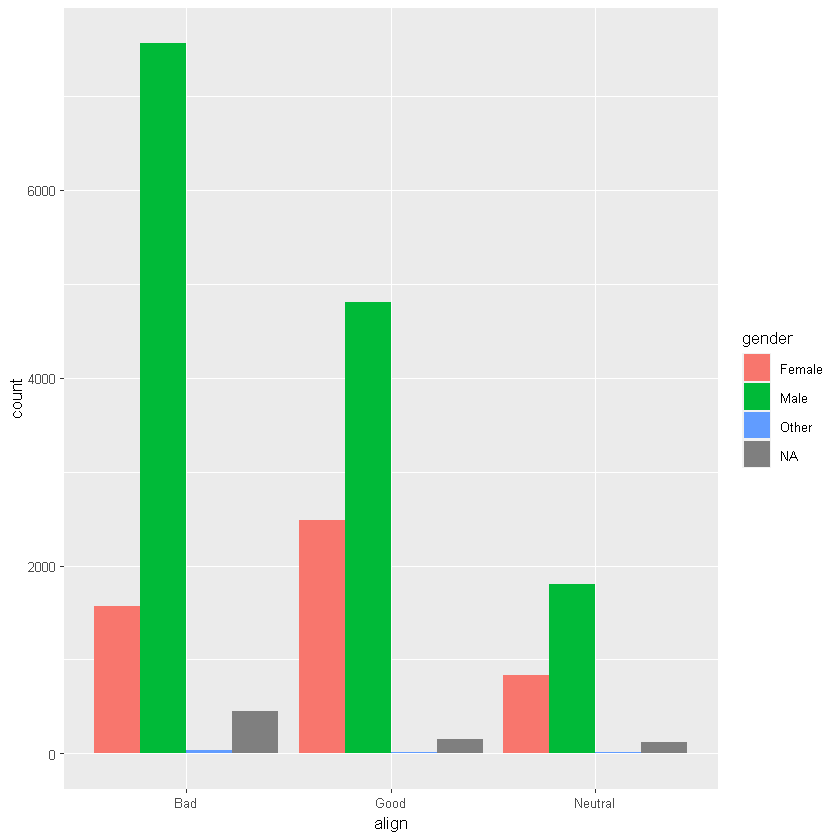

In [11]:
# Create side-by-side bar chart of gender by alignment
ggplot(comics_filtered, aes(x = align, fill = gender)) + 
  geom_bar(position = "dodge")

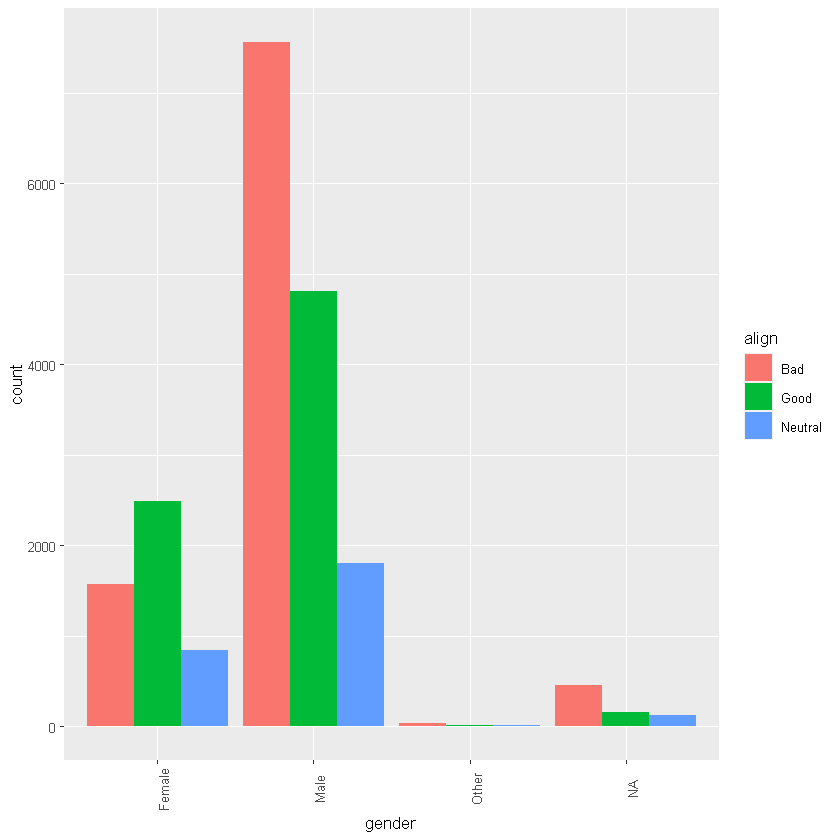

In [12]:
# Create side-by-side bar chart of alignment by gender
ggplot(comics_filtered, aes(x = gender, fill = align)) + 
  geom_bar(position = "dodge") +
   theme(axis.text.x = element_text(angle = 90))

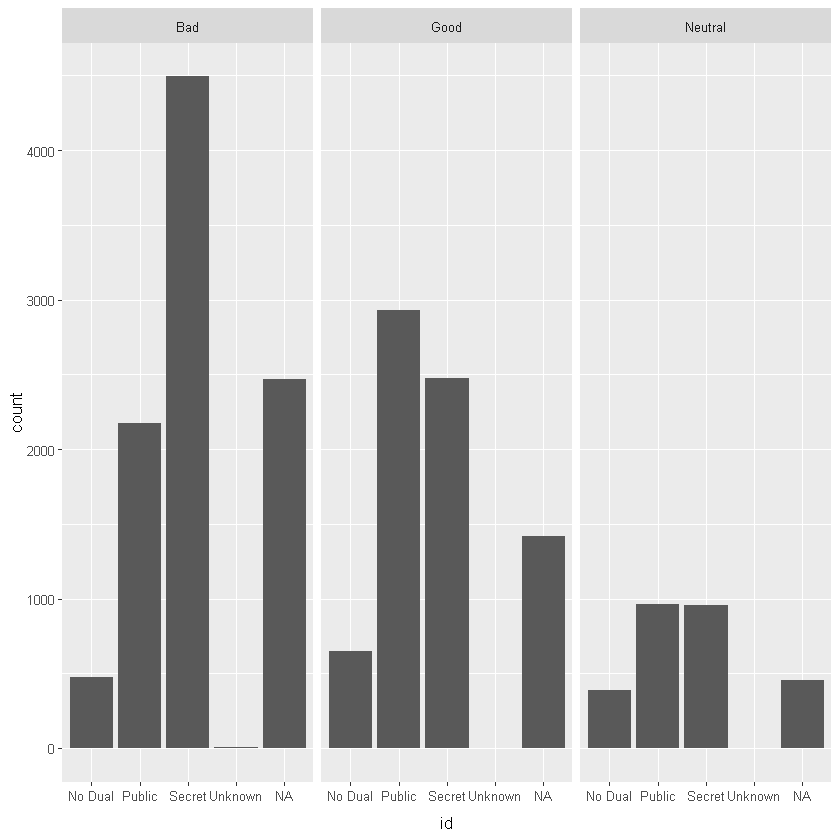

In [13]:
# Faceting
ggplot(comics_filtered, aes(x = id)) +
  geom_bar() +
  facet_wrap(~align)

☝️ This is basically a broken down stacked, (dodged) barchart where each facet represent one bar.

<a name="toc_74821_1.2"></a>
**1.2 Proportions**

**Marginal proportions**: When all values in a contingency table adds up to 100%

In [14]:
tab_cnt <- table(comics_filtered$id, comics_filtered$align)
prop.table(tab_cnt) # convert to a proportion table
sum(prop.table(tab_cnt))

         
                   Bad         Good      Neutral
  No Dual 0.0305530489 0.0417042671 0.0251385845
  Public  0.1400025783 0.1888616733 0.0622018822
  Secret  0.2896093851 0.1595333247 0.0618151347
  Unknown 0.0004512054 0.0000000000 0.0001289158

[1] 1

☝️  29% of chatacters are "Secret Bad". The sum of all propoprtions is 1.

**Conditional proportions** shows a systematic associations between variables. For example the proportion of public identity characters that are good. To build a table of these conditional proportions, add a 1 as the second argument, specifying that you'd like to condition on the rows. 

In [15]:
prop.table(tab_cnt, 1) # row proportions

         
                Bad      Good   Neutral
  No Dual 0.3136995 0.4281932 0.2581072
  Public  0.3580023 0.4829405 0.1590572
  Secret  0.5667970 0.3122240 0.1209789
  Unknown 0.7777778 0.0000000 0.2222222

☝️ 31% of Secret characters are Bad.

In [16]:
prop.table(tab_cnt, 2) # column proportions

         
                   Bad         Good      Neutral
  No Dual 0.0663308144 0.1069068077 0.1683937824
  Public  0.3039462636 0.4841374752 0.4166666667
  Secret  0.6287433529 0.4089557171 0.4140759931
  Unknown 0.0009795690 0.0000000000 0.0008635579

☝️ 63% of Bad characters are Secret.

Let's visualize conditional proportions:

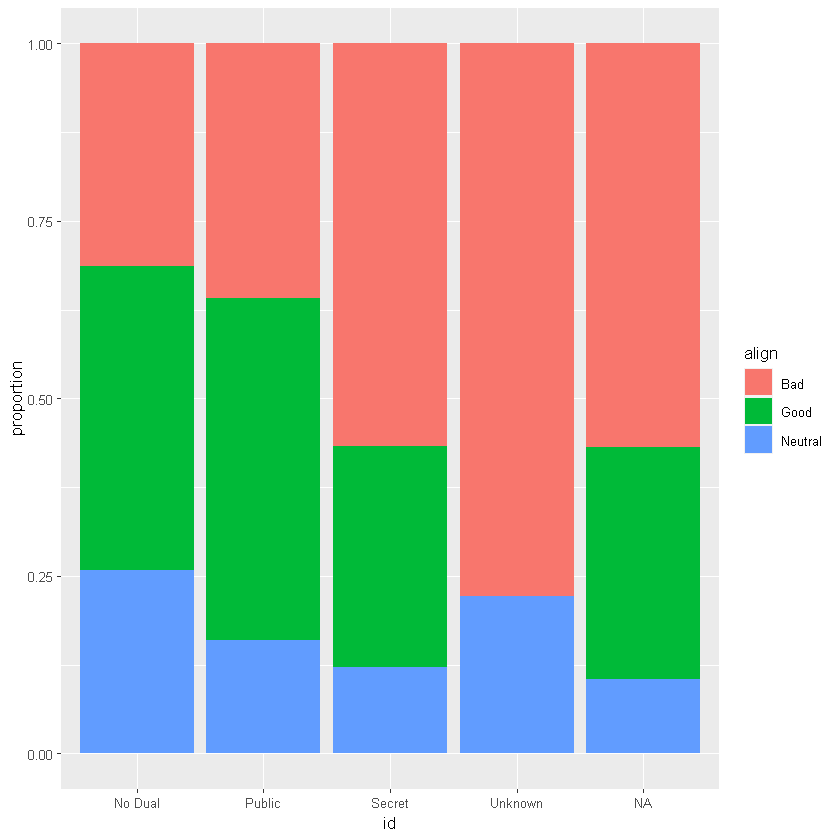

In [17]:
ggplot(comics_filtered, aes(x = id, fill = align)) + 
  geom_bar(position = "fill") +
  labs(y = "proportion")

☝️ Each bar sums up to 1 (100%)

<a name="toc_74821_2"></a>
## 2.   Exploring Numerical Data

<a name="toc_74821_2.1"></a>
**2.1 Distribution of one variable**

In [18]:
hs <- ggplot(cars, aes(weight)) +
 geom_histogram(bins = 30)  # always choose a meaningful bin size

ds <- ggplot(cars, aes(weight)) +
 geom_density(bw = 200) # always choose a meaningful bin size

bx <- ggplot(cars, aes(weight)) +
 geom_boxplot()

Warning message:
"Removed 2 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing non-finite values (`stat_density()`)."
Warning message:
"Removed 2 rows containing non-finite values (`stat_boxplot()`)."


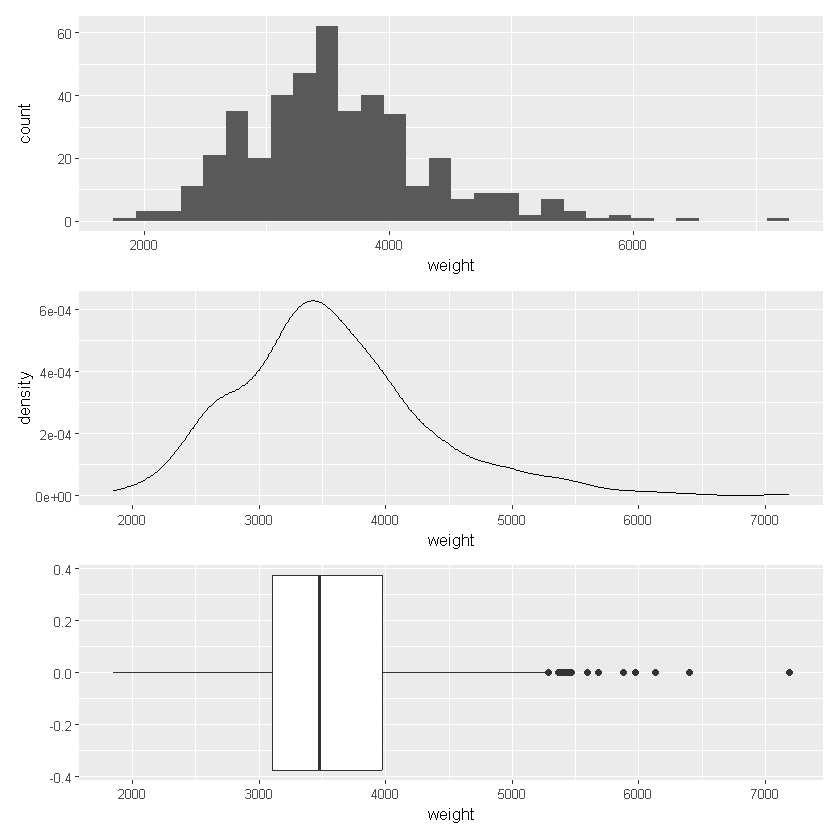

In [19]:
# Multi-panel plot using patchwork syntax
hs / ds / bx

☝️ These are a marginal distribution plots, because they contains information among only one variable.

Note: always look at the data with more than one way! E.g. if there were more than 2 modes (i.e. 2 peaks), we wouldn't see that in the boxplot.

<a name="toc_74821_2.2"></a>
**2.2 Distribution of two or more variables**

Faceting is a great way to compare distributions

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing non-finite values (`stat_bin()`)."


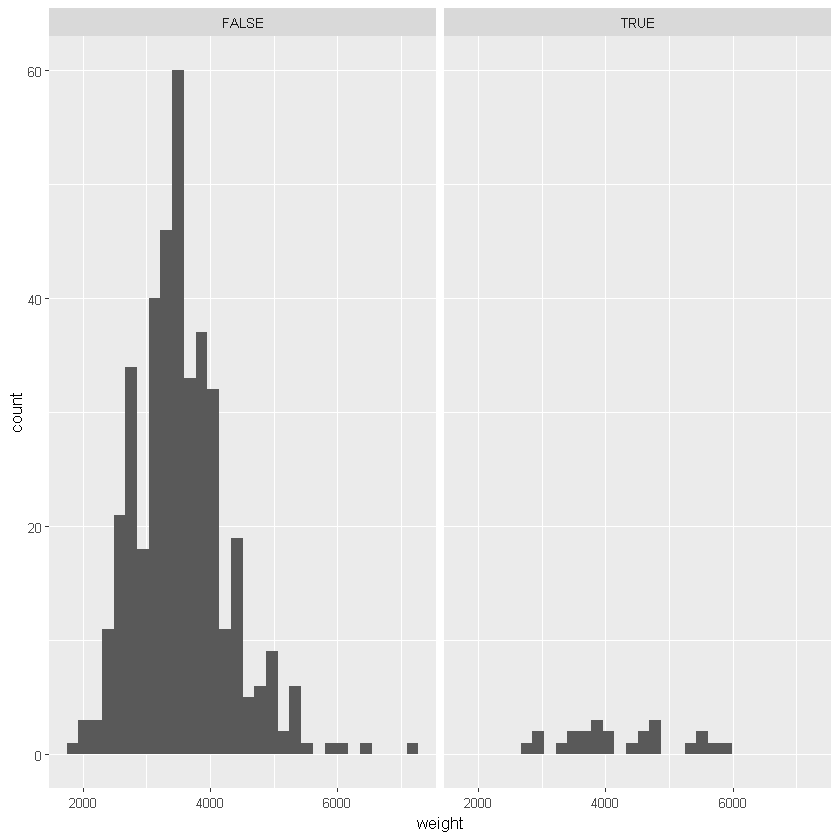

In [20]:
ggplot(cars, aes(weight)) +
 geom_histogram() +
 facet_wrap(~pickup)

☝️ it's clear that are many more non-pickups than pickups.

Warning message:
"Removed 11 rows containing non-finite values (`stat_boxplot()`)."


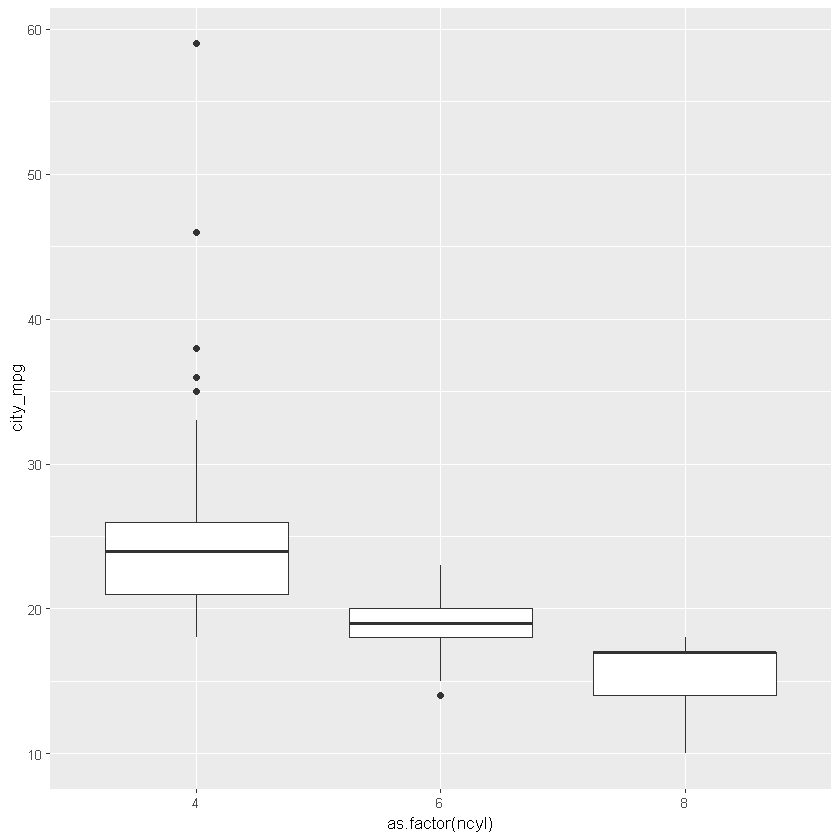

In [21]:
# Filter cars with 4, 6, 8 cylinders
common_cyl <- cars %>% filter(ncyl %in% c(4, 6, 8 ))

# Create box plots of city mpg by ncyl
ggplot(common_cyl, aes(x = as.factor(ncyl), y = city_mpg)) +
  geom_boxplot()

Warning message:
"Removed 11 rows containing non-finite values (`stat_density()`)."


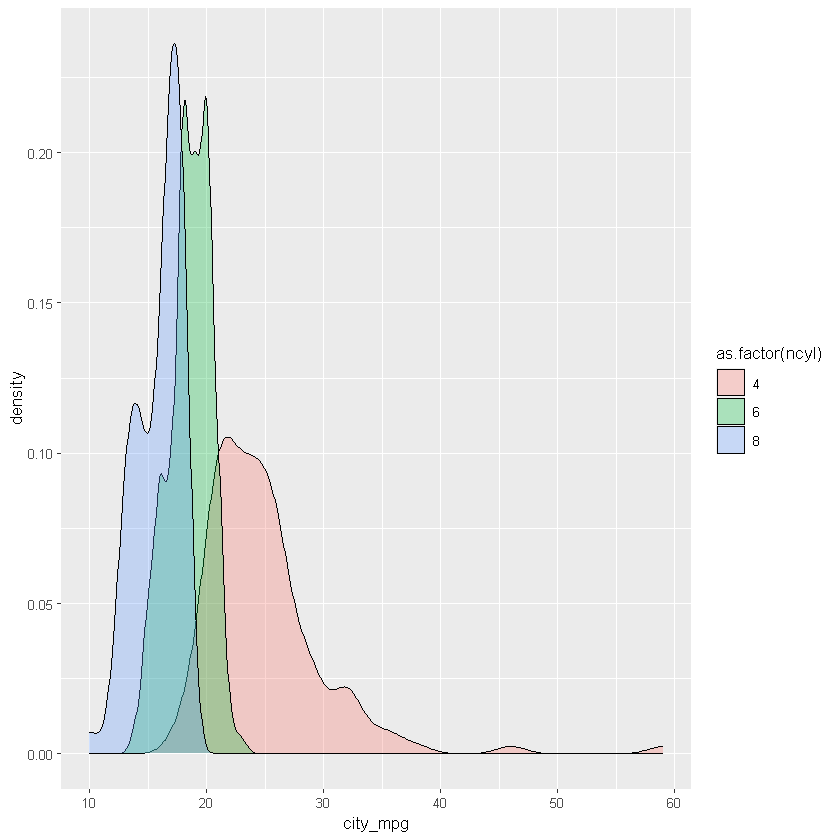

In [22]:
# Create overlaid density plots for same data
ggplot(common_cyl, aes(x = city_mpg, fill = as.factor(ncyl))) +
  geom_density(alpha = .3)

☝️ Some interpretations:
- The highest mileage cars have 4 cylinders.
- The typical 4 cylinder car gets better mileage than the typical 6 cylinder car, which gets better mileage than the typical 8 cylinder car.
- Most of the 4 cylinder cars get better mileage than even the most efficient 8 cylinder cars.

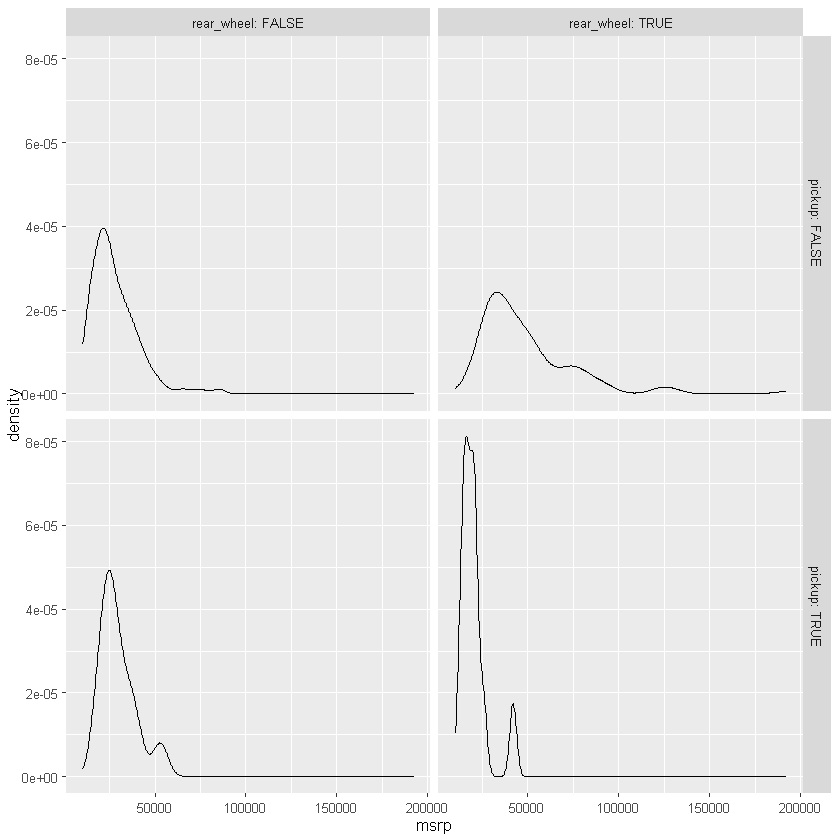

In [23]:
ggplot(cars, aes(x = msrp)) +
       geom_density() +
       facet_grid(pickup ~ rear_wheel, labeller = label_both)

<u>Distribution of more than 2 variables**</u>

We can use the following to add more levels to our visualization:
- shape
- size
- pattern
- movement
- x- | y-coordinate

<a name="toc_74821_3"></a>
## 3.   Numerical Summaries

<a name="toc_74821_3.1"></a>
**3.1 Center measures**

The choice of measure for center can have a dramatic impact on what we consider to be a typical observation, so it is important that we consider the shape of the distribution before deciding on the measure! 
Most commonly used center measures:
- Mean 
- Median - better than mean if the distribution is skewed
- Mode

In [24]:
# Prepare dataset
life2 <-
  life[,c(1, 2, 4, 5, 8)]
  names(life2) <- c("State", "County", "Year", "exp_F", "exp_M")

In [25]:
summary(life2$exp_F)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  72.33   77.69   78.86   78.78   79.93   85.02 

In [26]:
life2 %>%
  group_by(County) %>%
  summarize(mean(exp_F),
            median(exp_F)
            ) %>%
  head(3)

County,mean(exp_F),median(exp_F)
<chr>,<dbl>,<dbl>
Abbeville County,77.89192,77.640
Acadia Parish,75.76346,75.815
Accomack County,76.72577,76.945


<a name="toc_74821_3.2"></a>
**3.2 Measures of variability**

Some common measures of variability:
- range $\leftarrow$ can be misleading when there are outliers
- variance $\leftarrow$ `sum((x - mean(x))^2) / (n - 1)`, not really meaningful
- standard deviation (SD)  $\leftarrow$ `sqrt(var)` - has the same unit as x
- interquartile range (IQR)  $\leftarrow$ good for highly skewed distributions or for data with outliers (report it with median)
- CV% $\leftarrow$ independent from the scale of values

<div>
 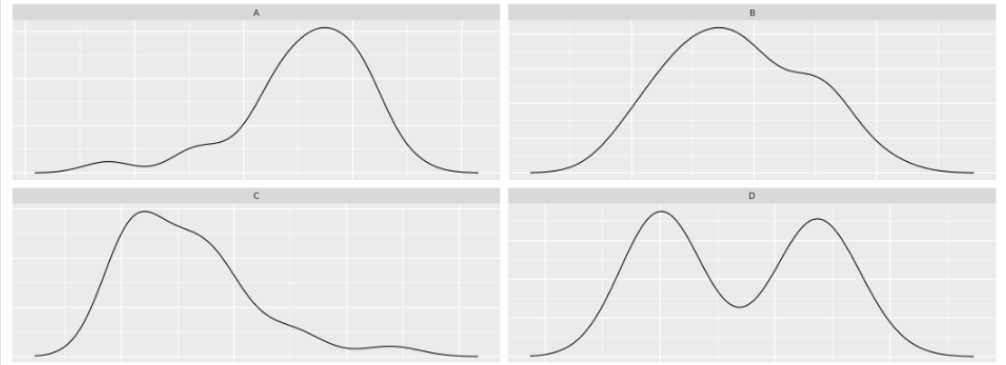
</div>

**A:** unimodal left-skewed; **B:** unimodal symmetric; **C:** unimodal right-skewed, **D:** bimodal symmetric.

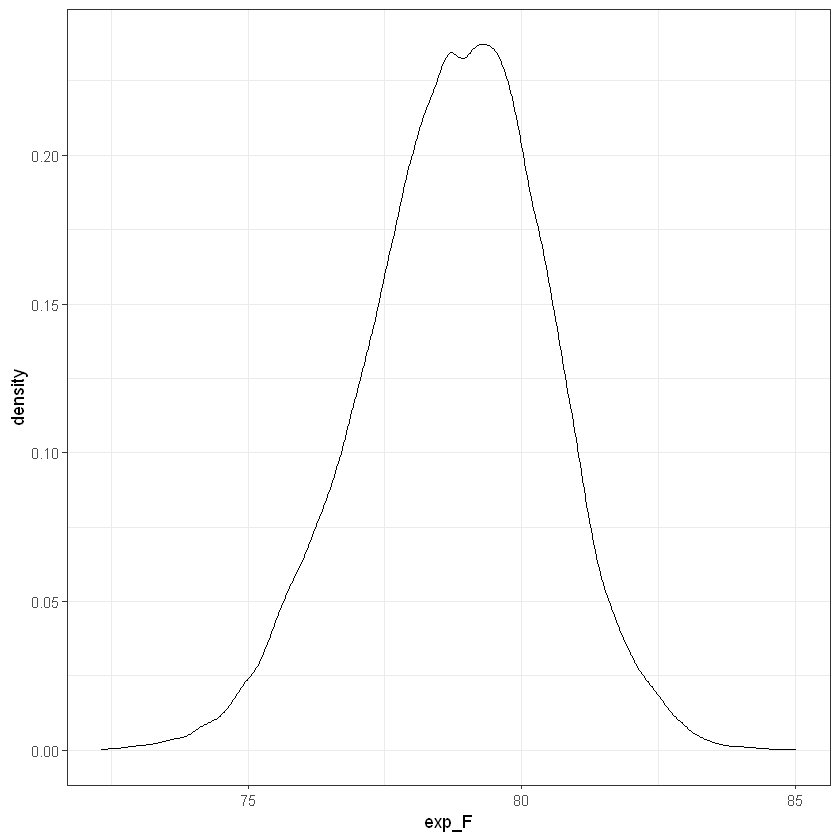

In [27]:
ggplot(life2, aes(exp_F)) +
  geom_density() +
  theme_bw()

In [28]:
diff(range(life2$exp_F))
var(life2$exp_F)
sd(life2$exp_F)
IQR(life2$exp_F)

[1] 12.69

[1] 2.822196

[1] 1.679939

[1] 2.24

Highly skewed distributions can make it very difficult to learn anything from a visualization. **Transformations** (e.g. log()) can be helpful in revealing the more subtle structure. It may make the distribution more symmetric.

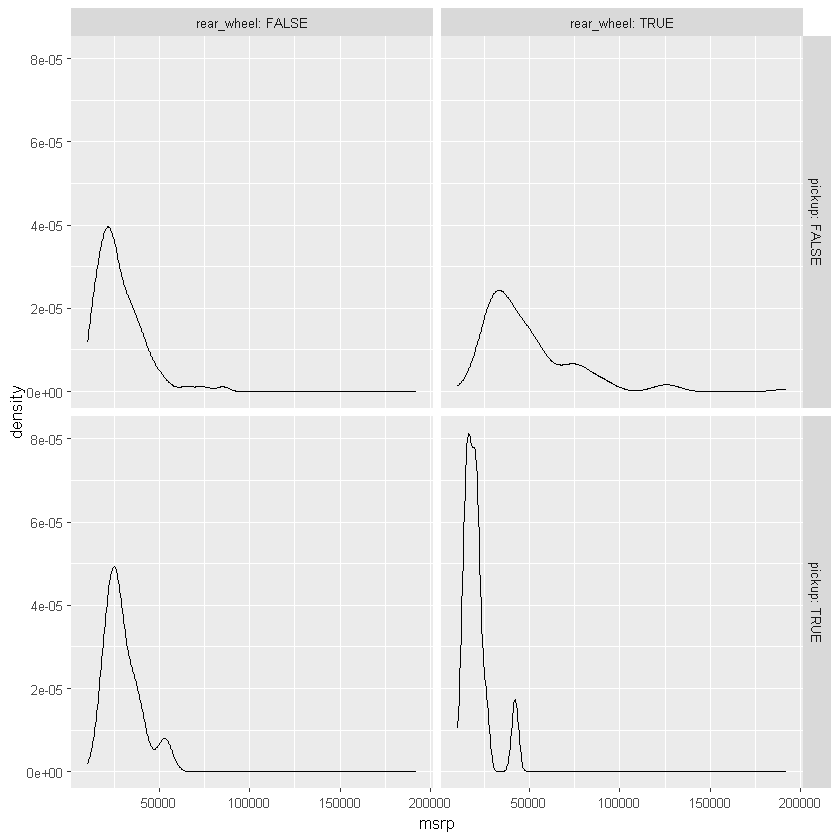

In [29]:
ggplot(cars, aes(x = msrp)) +
       geom_density() +
       facet_grid(pickup ~ rear_wheel, labeller = label_both)

In [30]:
cars_filt <- cars %>%
  filter(pickup == FALSE, rear_wheel == FALSE) %>%
  mutate(logmsrp = log(msrp))

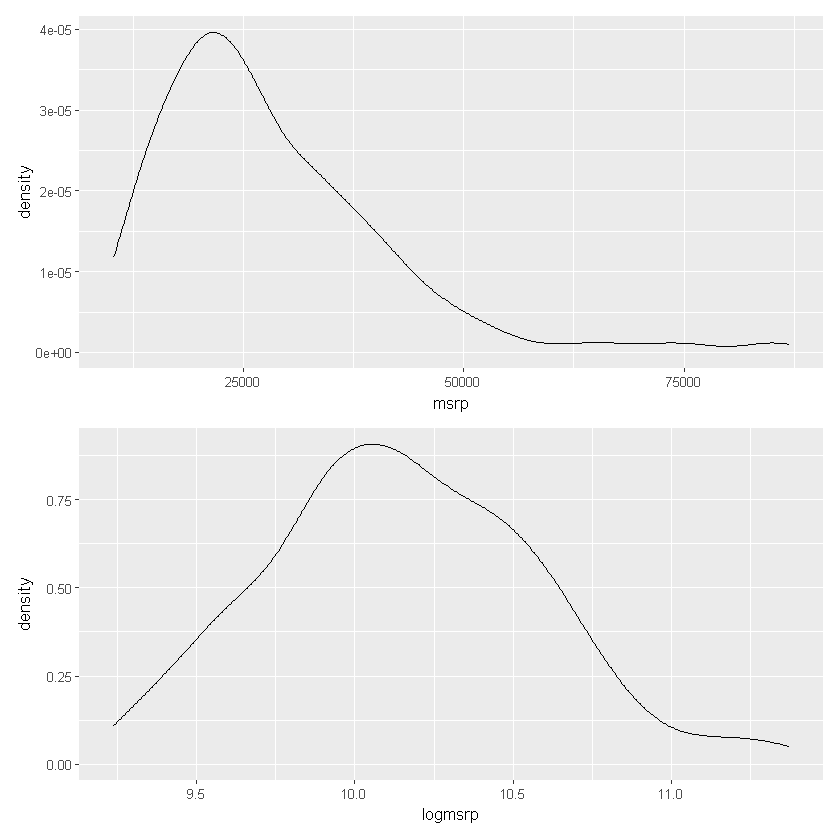

In [31]:
p1 <- ggplot(cars_filt, aes(x = msrp)) +
       geom_density()

p2 <- ggplot(cars_filt, aes(x = logmsrp)) +
       geom_density()

p1 / p2

<a name="toc_74821_3.3"></a>
**3.3 Outliers**

We can detect outliers in many ways:
- Boxplot

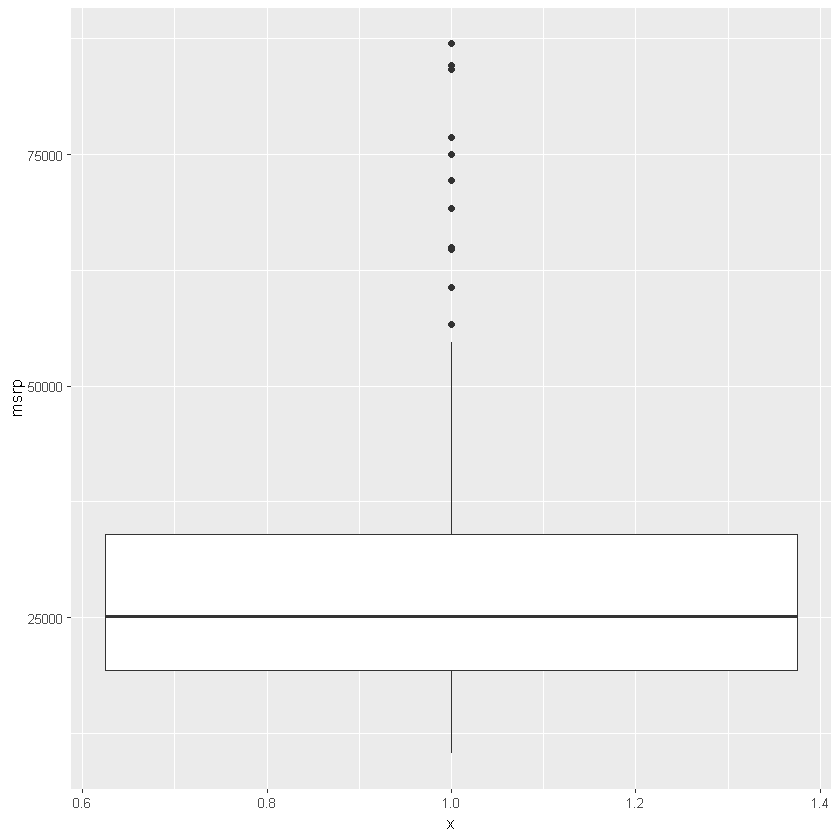

In [45]:
ggplot(cars_filt, aes(x = 1, y = msrp)) +  # if we have only 1 variable, set x = 1
       geom_boxplot()

☝️ We have many outlier

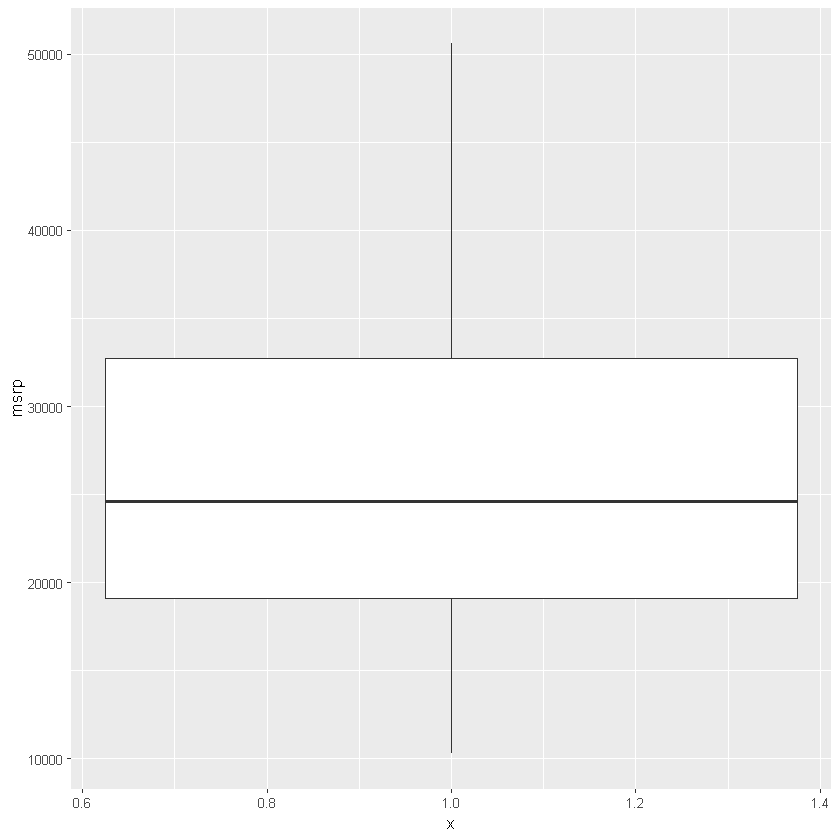

In [44]:
cars_filtnout <- cars_filt %>%
  mutate(is.outlier = msrp > 52000)  %>%
  filter(!is.outlier) 

cars_filtnout %>%
  ggplot(aes(x = 1, y = msrp)) +
       geom_boxplot()

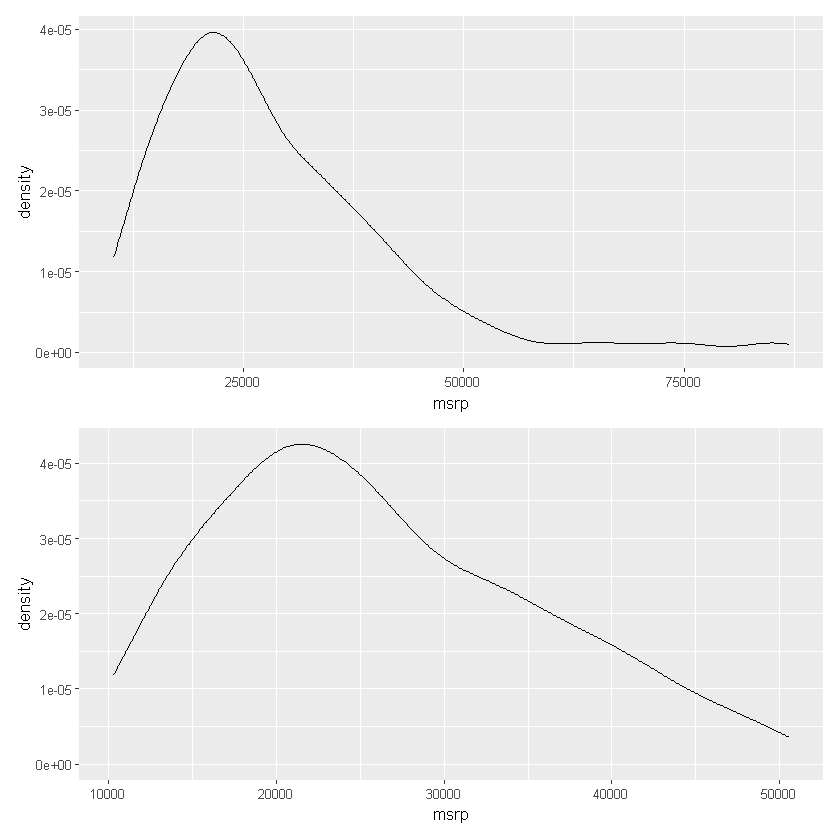

In [34]:
p3 <- ggplot(cars_filt, aes(x = msrp)) +
       geom_density()

p4 <- ggplot(cars_filtnout, aes(x = msrp)) +
       geom_density()

p3 / p4

☝️ The distribution looks better but we lost information that might be important.

<a name="toc_74821_4"></a>
## 4.   Case study - email dataset

Goal: Explore the association between spam and the length of an email.

In [51]:
# Load package
suppressMessages(library(openintro))

In [106]:
str(email)
#?email

tibble [3,921 x 21] (S3: tbl_df/tbl/data.frame)
 $ spam        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ to_multiple : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 2 1 1 ...
 $ from        : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ cc          : int [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ sent_email  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 2 1 1 ...
 $ time        : POSIXct[1:3921], format: "2012-01-01 07:16:41" "2012-01-01 08:03:59" ...
 $ image       : num [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ attach      : num [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ dollar      : num [1:3921] 0 0 4 0 0 0 0 0 0 0 ...
 $ winner      : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ inherit     : num [1:3921] 0 0 1 0 0 0 0 0 0 0 ...
 $ viagra      : num [1:3921] 0 0 0 0 0 0 0 0 0 0 ...
 $ password    : num [1:3921] 0 0 0 0 2 2 0 0 0 0 ...
 $ num_char    : num [1:3921] 11.37 10.5 7.77 13.26 1.23 ...
 $ line_breaks : int [1:3921] 202 202 192 255 29 25 193 237 69 68 ...
 $ fo

**1. Exercise:**  Find the appropriate statistics to use for the `num_char` variable containing email character length

spam,median(num_char),IQR(num_char)
<fct>,<dbl>,<dbl>
0,6.831,13.58225
1,1.046,2.81800


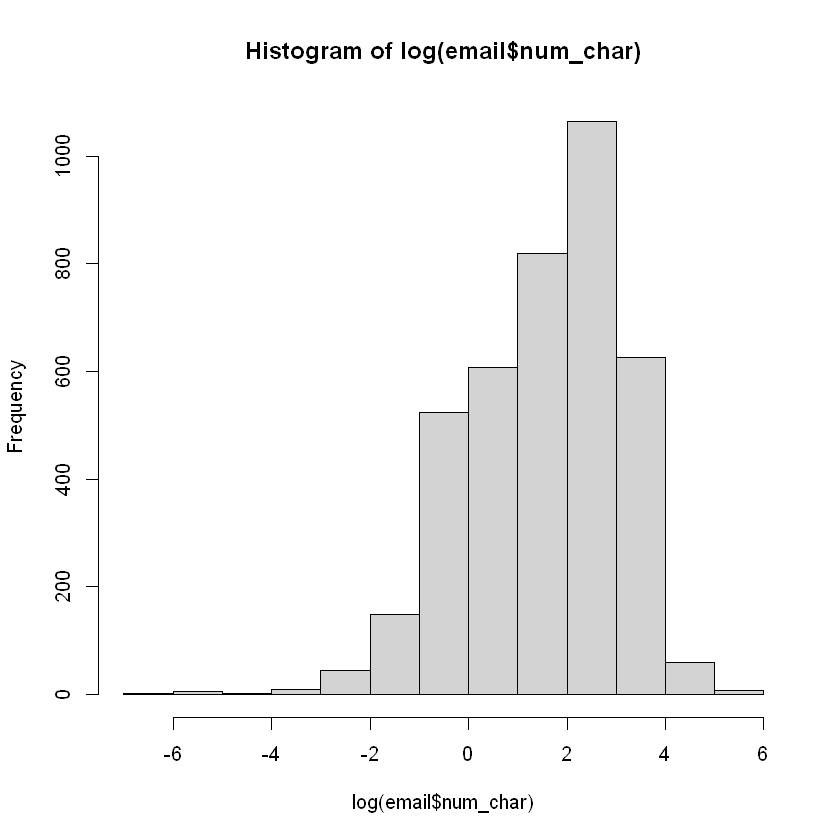

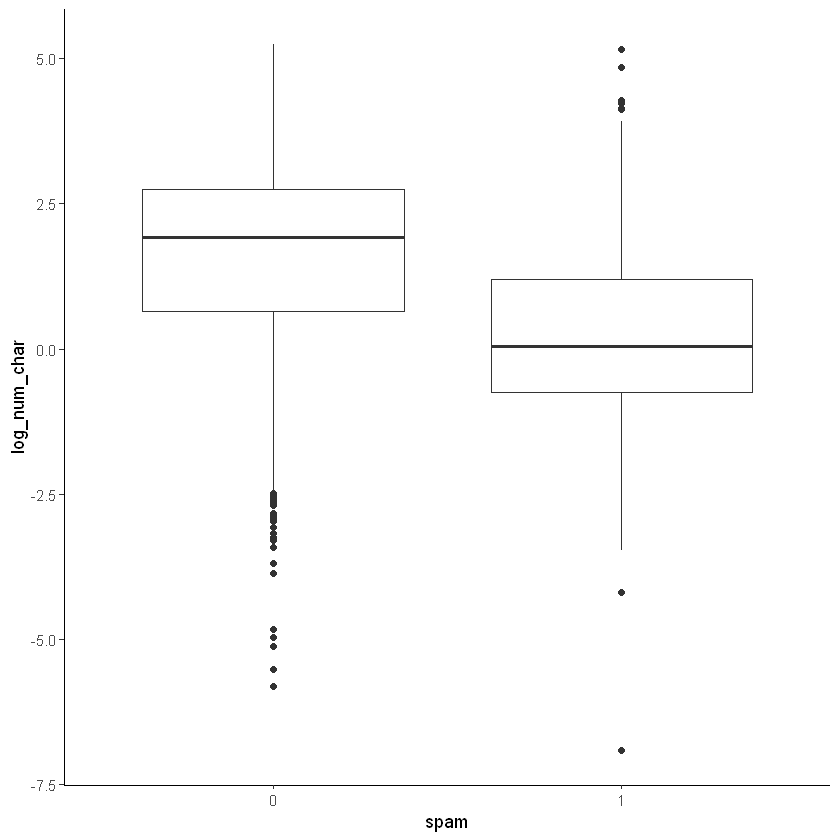

In [71]:
# Compute summary statistics

hist(log(email$num_char)) # skewed, hence median and IQR will be the appropriate summary stat

email %>%
  group_by(spam) %>%
  summarize(median(num_char),
            IQR(num_char))

# Create plot
email %>%
  mutate(log_num_char = log(num_char)) %>%  # log trasfrom skewed data
  ggplot(aes(x = spam, y = log_num_char)) +
  geom_boxplot() +
  theme_classic()

**2. Exercise:**  Find the appropriate statistics to use for the `exclaim_mess` variable containing the number of exclamation marks used.

spam,median(exclaim_mess),IQR(exclaim_mess)
<fct>,<dbl>,<dbl>
0,1,5
1,0,1


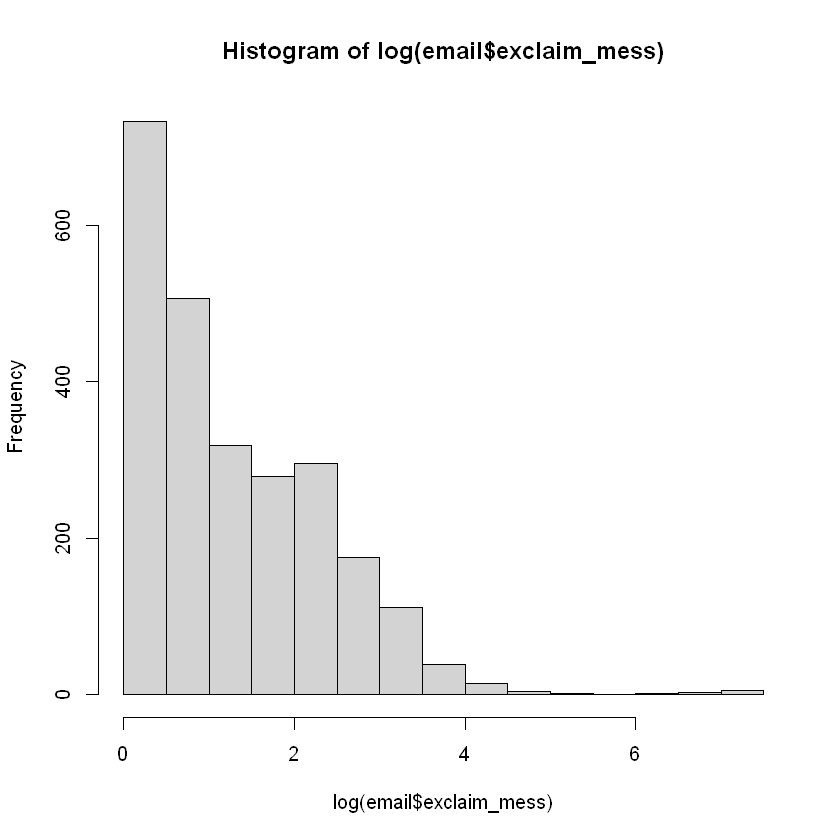

In [77]:

hist(log(email$exclaim_mess)) # skewed, hence median and IQR will be the appropriate summary stat

email %>%
  group_by(spam) %>%
  summarize(median(exclaim_mess), # here too median and IQR are better measures than mean and SD
            IQR(exclaim_mess))

pe1 <- email %>%
  mutate(log_exclaim_mess = log(exclaim_mess+0.01)) %>% # add a small number to avoid log(0)
  ggplot(aes(x = spam, y = log_exclaim_mess)) +
  geom_boxplot()

pe2 <- email %>%
  mutate(log_exclaim_mess = log(exclaim_mess+0.01)) %>% # add a small number to avoid log(0)
  ggplot(aes(log_exclaim_mess)) +
  geom_histogram() +
  facet_wrap(~spam)

pe3 <- email %>%
  mutate(log_exclaim_mess = log(exclaim_mess+0.01)) %>% # add a small number to avoid log(0)
  ggplot(aes(x = log_exclaim_mess, fill = spam)) +
  geom_density(alpha = 0.3)

☝️ **Tip**: If you decide to use a log transformation, remember that log(0) is -Inf in R, which isn't a very useful value and we would loose a lot of information! You can get around this by adding a small number (like 0.01) to the quantity inside the log() function. This way, your value is never zero. This small shift to the right won't affect your results.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


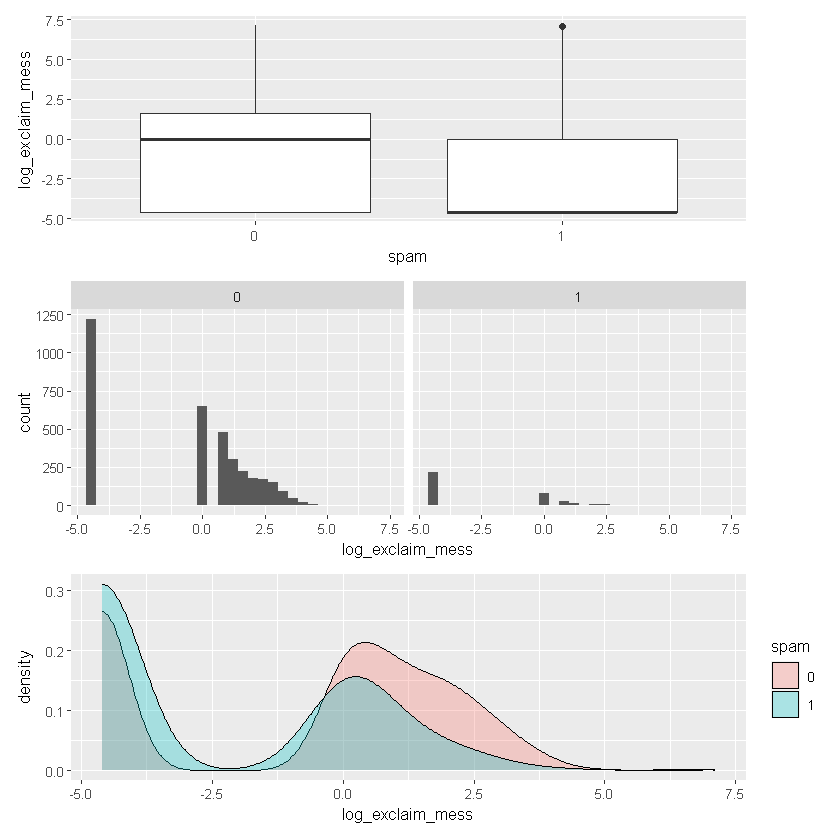

In [75]:
pe1 / pe2 / pe3

☝️ Conclusions:
- faceted histograms are the most appropriate here. 
- The most common value of `exclaim_mess` in both classes of email is zero, whic is represented as -4.6 in the plots (as log(0 + 0.01) = -4.6).
- Even after a transformation, the distribution of `exclaim_mess` in both classes of email is right-skewed.
- The typical number of exclamations in the not-spam (`spam` = 0) group appears to be slightly higher than in the spam group.

<u>Zero inflation strategies</u>

Zero inflation  is when we have datasets with many zeros and relatively few non-zeros.

For example, when we looked at the distribution of spam and the number of exclamation marks used, we found that both distributions are heavily right skewed: there are only a few instances of many exclamation marks being using and many many more of 0 (here -4.6 on log scale) being used.

There are several common ways to think about those zeros.
-  Collapse into two-level separately: We can think of the variable as actually only taking two values, zero or not-zero, and treating it like a categorical variable. 
- Analyze the two components separately: We say that there are two mechanisms going on: one generating the zeros and the other generating the non-zeros, so we will analyze these two groups separately. 

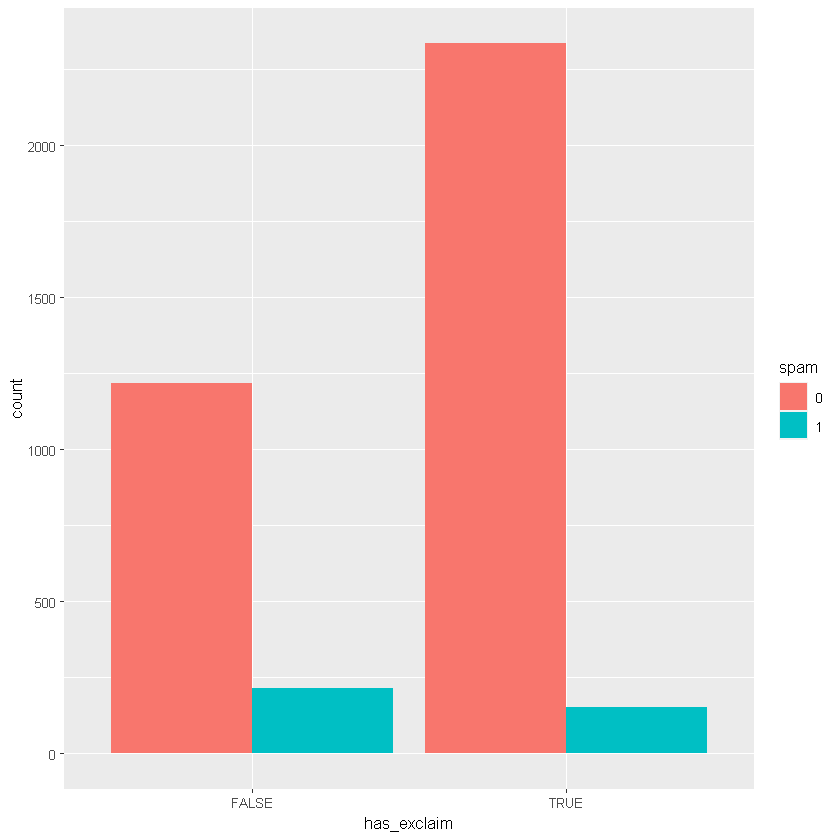

In [104]:
# First approach
email %>%
  mutate(has_exclaim = exclaim_mess > 0) %>%
  ggplot(aes(x = has_exclaim, fill = spam)) +
  geom_bar(position = "dodge")

☝️ We have lost a lot of information but now it become very clear that, contrary to our expectation, non-spam (`spam = 0`) is more likely to contain exclamation marks, while in spam, the opposite is true.

**3. Exercise:** Now let's test the relationship of variables in the dataset. The `?email` help file is ambiguous: do attached images (`image`) count as attached files (`attach`) in this dataset? How can we figure this out?

In [109]:
# Test if images count as attachments
sum(email$attach > 0)
sum(email$image > 0)
sum(email$image > email$attach)

[1] 283

[1] 110

[1] 0

☝️ Since image is never greater than attach, we can infer that images are counted as attachments.

**4. Exercise:** Within non-spam emails, is the typical length of emails shorter for those that were sent to multiple people?

In [111]:
email %>%
   filter(spam == 0) %>%
   group_by(to_multiple) %>%
   summarize(median(num_char))

to_multiple,median(num_char)
<fct>,<dbl>
0,7.1960
1,5.3645


☝️ Yes, the typical length of non-spam sent to multiple people is a bit lower than those sent to only one person

**5. Exercise:** For emails containing the word "dollar", does the typical spam email contain a greater number of occurrences of the word than the typical non-spam email?

In [112]:
email %>%
  filter(dollar > 0) %>%
  group_by(spam) %>%
  summarize(median(dollar))

spam,median(dollar)
<fct>,<dbl>
0,4
1,2


**6. Exercise:** If you encounter an email with greater than 10 occurrences of the word "dollar", is it more likely to be spam or not-spam? Create a bar chart that answers this question.

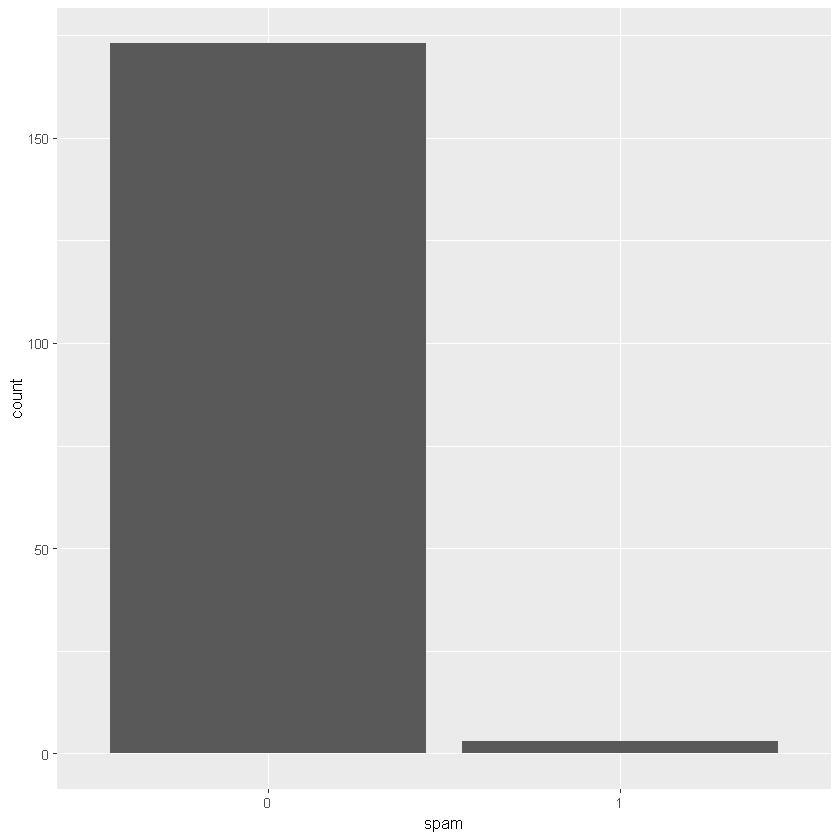

In [113]:
email %>%
  filter(dollar > 10) %>%
  ggplot(aes(x = spam)) +
  geom_bar()

**7. Exercise:** Explore the association between `number` and `spam`, select and construct an informative plot. 

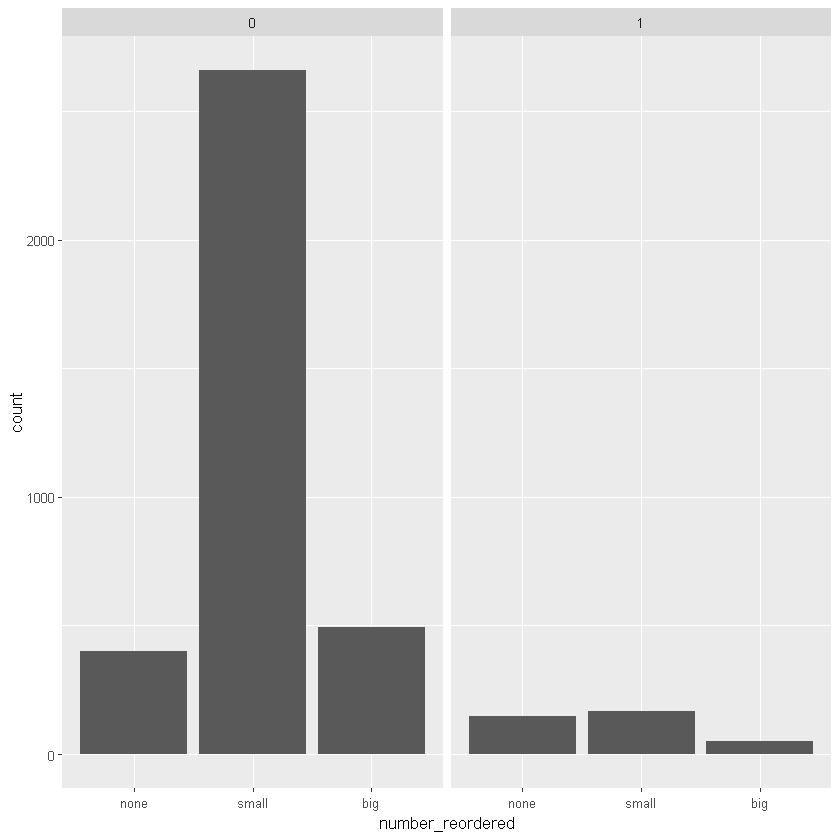

In [114]:
# Reorder levels
email$number_reordered <- factor(email$number, levels = c("none", "small", "big"))

# Construct plot of number_reordered
ggplot(email, aes(number_reordered)) +
  geom_bar() +
  facet_wrap(~spam)

☝️ Conclusions:
- Given that an email contains a small number, it is more likely to be not-spam.
- Given that an email contains a big number, it is more likely to be not-spam.
- Within both spam and not-spam, the most common number is a small one.

In [35]:
head(email)

ERROR: Error in head(email): object 'email' not found
